Imports and Read in File

In [1]:
%matplotlib inline 

import pandas as pd
import numpy as np
from sklearn import cluster
from sklearn import metrics
from sklearn.metrics import pairwise_distances
import matplotlib.pyplot as plt
import matplotlib
matplotlib.style.use('ggplot') 

In [2]:
adult = pd.read_csv("../../assets/datasets/adult.csv")

Convert the data to a Pandas dataframe

In [3]:
adult.head(2)

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,small
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,small


In [4]:
df = pd.DataFrame(data=adult, columns=['workclass', 'education-num', 'hours-per-week', 'income'])
df.head(2)

,workclass,education-num,hours-per-week,income
0,State-gov,13,40,small
1,Self-emp-not-inc,13,13,small


Convert the categorical Data to numeric

In [5]:
def workclass_to_numeric(x):
    if x=='Federal-Gov':
        return 1
    if x=='Local-Gov':
        return 2
    if x=='Never-Worked':
        return 3
    if x=='Private':
        return 4
    if x=='Self-emp-inc':
        return 5
    if x=='Self-emp-not-inc':
        return 6
    if x=='State-gov':
        return 7
    if x=='Without-pay':
        return 8
    
def income_to_numeric(x):
    if x=='small':
        return 1
    if x=='large':
        return 2

Apply the functions and append them to the dataframe

In [6]:
df['workclass_num'] = df['workclass'].apply(workclass_to_numeric)
df['income_num'] = df['income'].apply(income_to_numeric)
df.head(n=5)

,workclass,education-num,hours-per-week,income,workclass_num,income_num
0,State-gov,13,40,small,7.0,1.0
1,Self-emp-not-inc,13,13,small,6.0,1.0
2,Private,9,40,small,4.0,1.0
3,Private,7,40,small,4.0,1.0
4,Private,13,40,small,4.0,1.0


Plot the Data to see the distributions

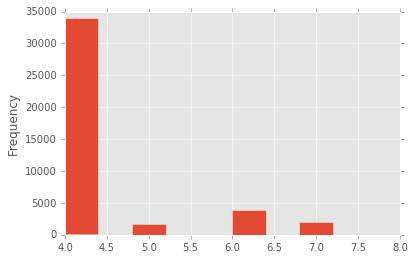

In [7]:
df['workclass_num'].plot(kind='hist',stacked=False);

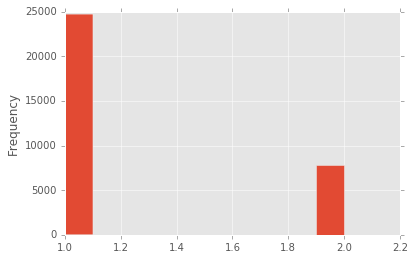

In [8]:
df['income_num'].plot(kind='hist',stacked=False);

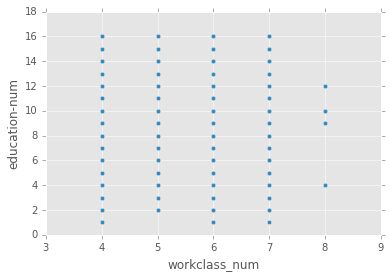

In [9]:
df.plot(kind='scatter',x='workclass_num',y='education-num')

Since the values are discrete - a scatterplot won't help us much here, however this can give us a clue as to our clusters 

Create a New Dataframe with just numerical data

In [10]:
df_new = pd.DataFrame(data=df, columns=['workclass_num', 'education-num', 'hours-per-week', 'income_num'])
df_new2 = pd.DataFrame(data=df, columns=['workclass_num', 'education-num'])
df_new.head(5)

,workclass_num,education-num,hours-per-week,income_num
0,7.0,13,40,1.0
1,6.0,13,13,1.0
2,4.0,9,40,1.0
3,4.0,7,40,1.0
4,4.0,13,40,1.0


Check for NaN and Infinite Numbers

In [11]:
np.any(np.isnan(df_new))

True

In [12]:
np.any(np.isnan(df_new2))

True

Remove the NaN

In [13]:
dfn = df_new2.dropna()

In [14]:
np.any(np.isnan(dfn))

False

In [15]:
print len(dfn)
dfn.head(2)

41465


,workclass_num,education-num
0,7.0,13
1,6.0,13


Cluster the Data - We are going to use 5 clusters based off of the above scatterplot

In [16]:
k = 3
kmeans = cluster.KMeans(n_clusters=k)
kmeans.fit(dfn)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=3, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

Get the labels and centroids

In [17]:
labels = kmeans.labels_
centroids = kmeans.cluster_centers_

In [18]:
labels

array([2, 2, 0, ..., 2, 2, 2], dtype=int32)

In [19]:
centroids

array([[  4.32776436,   9.47919553],
       [  4.24857839,   5.33123477],
       [  4.5267683 ,  13.32387874]])

Compute the Silhoutte Score

In [ ]:
s = []
for k in range(2, 10):
    kmeans = cluster.KMeans(n_clusters=k)
    kmeans.fit(dfn)
    labels = kmeans.labels_
    s_i = metrics.silhouette_score(dfn, labels, metric='euclidean')
    s.append(s_i)

In [ ]:
plt.plot(range(2,6), s)
plt.ylabel("Silouette")
plt.xlabel("k")